How os 
1. manages phyical memory 
1. provide processes with the illusion of virutal memory

### OS Memory Management Systems
1. Intelligently sized containers: memory pages or segments (size can be an important design consideration)
1. Notall memory is needed at once: tasks operate on subste of memeory
1. Optimized for performance: reduce time to access state in memeory->better performance
    1. to achieve some performance related optimizations, memory management subsystems rely on hardware support like translation lookaside buffers (TLBs)
    1. rely on caches
    1. in software algorithms 
        1. for page replacement 
        1. for memory allocation


### Role of OS/Memory Managemnt System
1. to manage physical resources on behalf of one or more eecuting processes.
1. in order not to impose any limits on the size and the layout of an address space based on the acmoung of physical memoery or how it's shared with other processes, we decouple the notion of physical memory from the vitual memory used by the address space
1. Virutal vs Physical Memory
    1. pretty much everything uses virtual addresses which are translated to actual physical addresses where the particualr state is stored
    1. the range of the virutal addresses from V0 to Vmax establishes the amount of virutal memory visible  in the system which can be much larger than the actual amount of physical memory
    1. in order to management the physical memory the OS must then be able to allocate phycial memory and arbitrate how it's being accessed
1. Allocate: allocation & replacement 
    1. requires that OS incorporate certain mechanisms or algrorithms as well as data structures so that it can track how physical memoery is used and what is free among the physical memory
    1. the OS must ahve mechanisms to decide how to replace the content that are currently in physical memoery with needed content that's on secondary storage: it's likely that some of the content that are needed in the virutal address space are not avaible in the physical memeory. They may be stored on on some secondary storage like on disk.
    1. determines when conetent should be brought in  from disk and which content from memory should be stored on disk, depending on the kinds of processes running
1. Arbitrate
    1. require OS can quickly interpret and verify a process memeory access
        1. when looking at a virual address the OS should quickly be able to translate that virtual address into physical address
        1. to validate it to verify that that is indeed a legal access
        1. replys on a combination of harware support and smartly designed data structures used in the process of address translation and validation
1. Page-based memory management
    1. the virtual address sapce is subdivided into fixed sized segments called pages
    1. physical memeory is divided into page frames of the same size
    1. allocation: map pages from the vriual memory into page frames of the physical memory
    1. arbitration of access is done via page tables
1. segment-based memoery management
    1. the allocation process doesn't use more flxibley-sized segemnt that can be mapped to some regions in physical memory and swapped in and out of physical memory.
    1. arbitration of accesses in order to either translate or validate the access, segment registers is used (typically supported on modern hardware)
1. Paging is the dominant method used in current operating systems
 

### Hardware support
1. every cpu package is equipped with a Memory Management Unit (MMU)
    1. the CPU issues virtual addresses to the MMU and it's responsible for translating them into physical address
    1. Or potentially the MMU can generate a fault, an exception or signal that's generated by the MMU that can indicate on of several things
        1. illegal access (not allocated)
        1. Inadequate permissions to perform a particular access (to a right protected page)
        1. any type of fault may be an indication that the particual page referenced isn't present in memoery and must be fetched from disk
1. Designated registers during the address tranlation process
    1. in a page-based system, ther are register used to point to the currently active page table 
    1. in a segment-based system,  the registers are used to indicate the base address of the segment, its limit, and overall size of the segment, total number of segments and similar informaiton 
1. most MMU integrate a small cache of valid virtual to physical address translations (tranlation lookaside buffer or TLB)
    1. make the entire translation process much faster if the translation is present in this cache (no need to perform any additional operations to access thepage table or the segment to interpret the validity of the access)
1. the actual generation of phycial address from the virual address or the translation process is don't by the hardware 
    1. the OS maintain some data structures such as page table to maintain certian information necessary for the tranlation process
    1. the actual tranlation, the hardware perform it, which implies 
        1. the hardware dicatate what type of memory managemnet modes are supported (paging/segmentation/both), are there any kinds of registers of this sort?
        1. what kinds of pages can there be 
        1. what's the virtual address format and the physical address format since the hardware needs to understand both 

### Software aspects of memory management:
1. Other Ascpects of memory managment that are more flexible in terms of their design since they are performanced in software
1. the actual allocation: determining which portions of the main memory will be used by which process that's done by software 
1. replacement policy determine which portion of state will be in main memory vs on disk
    

### Page tables
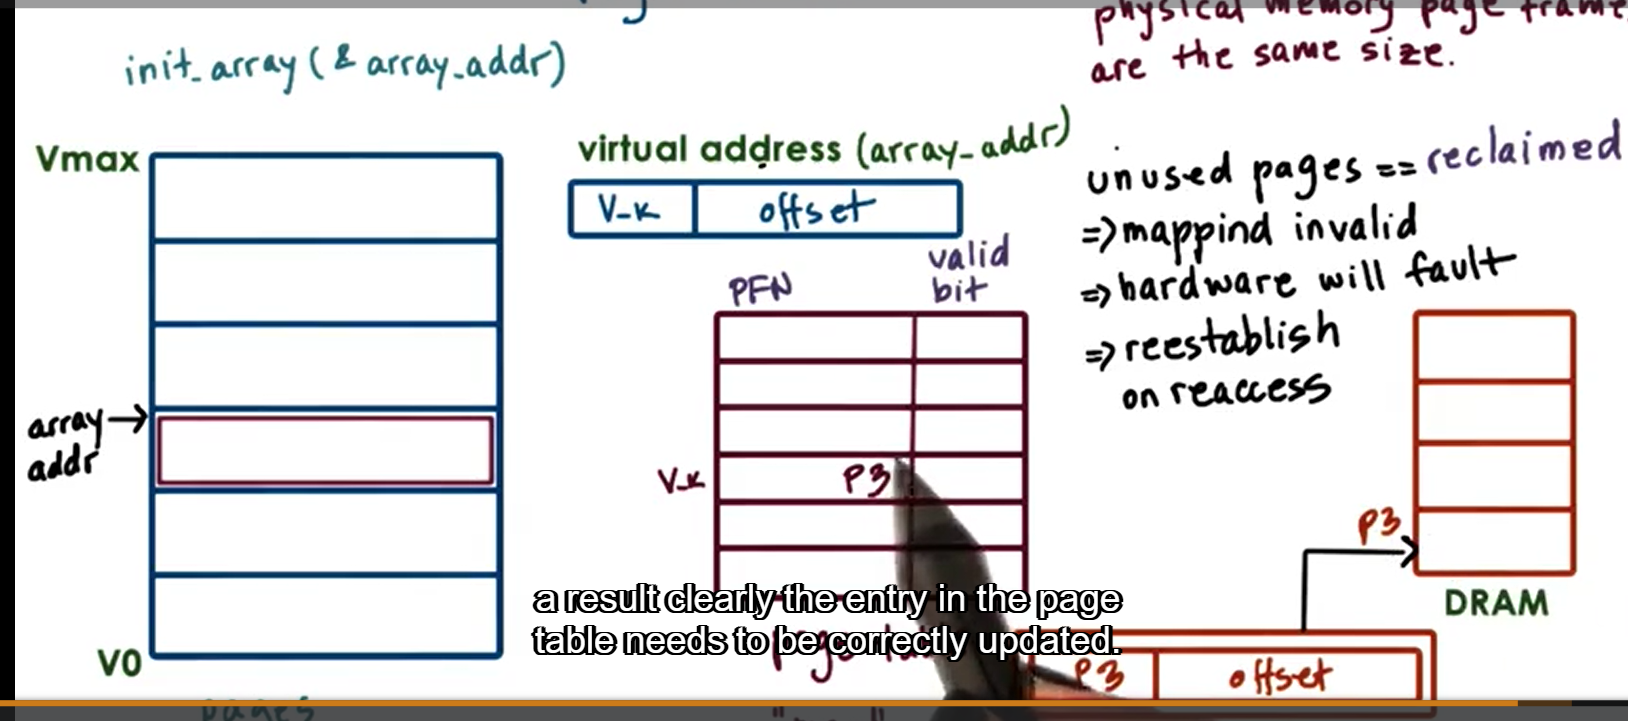
1. used to translate the vritual memory addresses into physical memory addresses
1. for each vritual address, an entry in the page table is used to determine the actual physical location that corresponds to that virtual address
1. it's like a map telling the OS and the hardware where to find specific virtual memory references 
1. by keeping the size of virutal and physical memory pages the same, we dont' have to keep track of the translation of every singel individual virtual address.
    1. we can only translate the frist virtual address in a page to the first virtual address in a page frame in physical memory
    1. the remaining addresses in the virtual memory page will map to the corresponding offsets in teh physical memory page frame 
    1. as a result we can reduce the number of entries we have to maintain in the page table 
1. only the first portion fo the virtual address is used to index into the page table  
    1. VPN: virtual page number 
    1. the rest of the virtual address is the actual offset 
    1. VPN is used as an offset into the page table, which will produce the physical frame number (PFN) 
    1. PFN: the physical address of the physical frame in DRAM
    1. to complete the full translation of the virtual address, the physical frame number neededs to be sent with the offset in the later part of virtual address to produce the actual virtual address
    1. physical address can ultimately be used to reference the appropriate location in physical memory
1. allocation on the first touch
    1. the physical memory for this array is only allocated when the processs isfirst trying to access it during this initialization routine
    1. reason: we want to make sure that physical memory is allocated only when it's really needed because sometimes programmer may create data structure never used.
1. if a process haven't used some of its memory pages for a long time, these pages will be reclaimed
    1. content will no longer be present in physical memeory
    1. pushed on disk
    1. some other content will be in physical memory
1. page table entries don't just consist of the PFN, they also have a number of bits that tell the memory managment the validtiy of the access
    1. if the page is in memeory and the mapping is valid, then this bit is 1
    1. if page is not in memory then this bit is 0
    1. the hardware MMU see that this is a bit 0 in the page table entry it will raise a fault (trap to the operating system)
    1. if the hardware determines that the mapping is invalid and fault then control gets passed to the OS
    1. the OS get s to decide a number of questions 
        1. should the access be permitted
        1. where exactly is the page located 
        1. where it should be brought into DRAM
1. as long as a valid address is being accessed ultimately in fault there will be a mapping that will be reestablished between a valid virtual address and the valid location in physical memory
    1. if the page was pushed in disk and now it's being brought back into memory, it willbe palced in a completely different meory lcoation 
    1. the entry in the page table needs to be updated

1. Summary:
    1. the OS will maintain a page table on every single process that exists
    1. on context switch, switch to valid page table
    1. hardware assist with page table accesses by maintaining a register that points to the active page table 
        1. on X86 there is a register CR3
        1. on a context switch we will have to chagne the contents of the CR3 register with the address of the new page table 


### Page Table Entry
1. Page Frame Number(PFN)
1. Flags: 
    1. OS uses during memory managment operations
    1. the hardware understand and knows how to interpret    
    1. Presetn: at least a valid bit (presetn bit, indicating whether the content of the virutal memory are actually rpesent in teh physical memory or not)
    1. Dirty (written to) gets set whenever apage is written to 
        1. useful in file systems where files are cached in memory
        1. we can detect using this dirty bit which files have been written to and need to be updated on disk
    1. Accessed (for read or write)
        1. keep track of in general whether the page has been accessed period for read for write  
    1. protection bits => RWX
#### Page Table Entry on x86
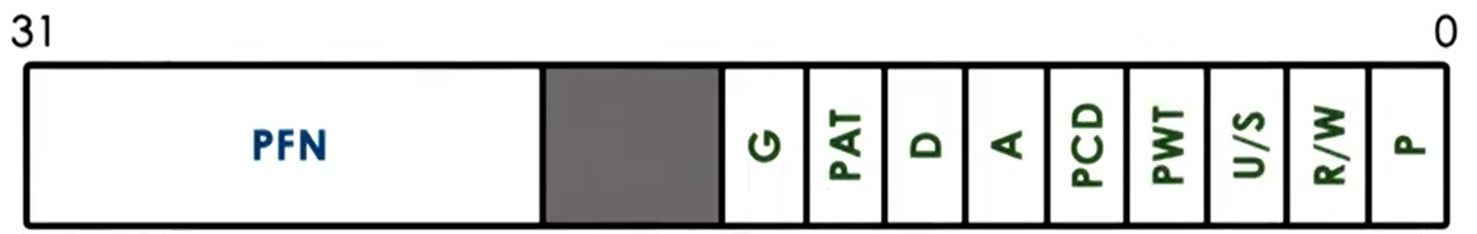
Flags:
1. (P)Present
1. (D)Dirty
1. (A)Access
1. R/W => permission bit 0->read only 1->R/W
1. U/S => permission bit 0->user mode 1->supervisor mode only (in the kernel basically)
1. Others: caching related info (write through, caching disabled ...)
1. Unused: for future use (grey area)

### Page Fault
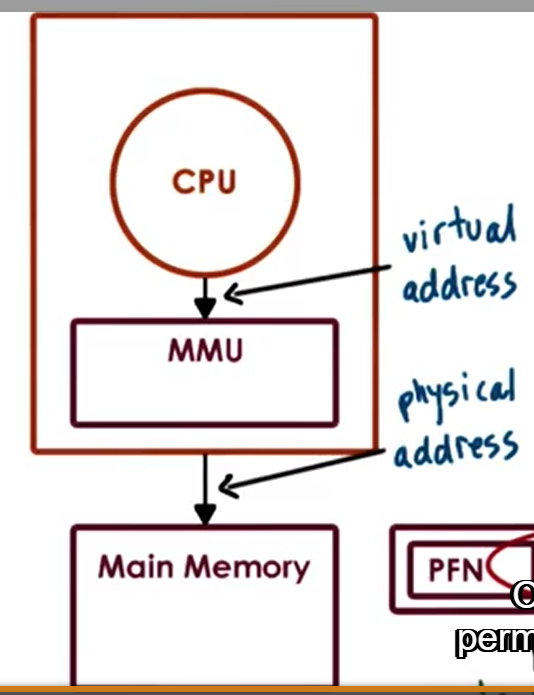
The MMU uses the page table 
1. to perform the translation
1. relies on teh bits to establish teh validity of the access
1. if hardware determines that physical memory acess can't be performed it causes a page fault
1. then the CPU will place an error code on the stack of the kernel, and it will generate a trap into the OS kernel
1. That will in turn generate a page fault handler
    1. determines action based on error code and faulting address
1. Key infomration in error code include 
    1. whether the fault was caused becuase the page was not present -> bring page from disk to memeory
    1. there is permission protection that was violated -> protection error (SIGSEGV)
1. On x86 platform
    1. error code is generated from some of the flags in the page table entry (PTE)
    1. faulting address is stored in a register CR2

### Page Table Size
1. number of entries = number of virtual page numbers that exist in a virtual address space
1. for every entry, page table need to hold 
    1. the physical frame number 
    1. other information like the permission bits
1. 32-bit architecture
    1. Page table entry (PTE): 4 bytes including PFN + Flag
    1. virtual page number (VPN): 2^32/Page size
    1. page size: 4kb (8kb, 2mb, 4mb, 1gb... different hardware platforms support diffrerent page sizes)
        1. == (2^32/2^12)*4b = 4MB per process 
1. 64-bit
    1. page table: 8 bytes
    1. (2^64/2^12)*8b = 32PB
1. process doesn't use entire address space
1. even on 32-bit arch will not always use all of the 4GB
1. But page table assumes an entry per VPN regardless of whether corresponding virtual memory is needed by the process or not 
1. page table design explodes the requirement of page table size 

### Hierachical Page Table
1. No more flat page tables => hierachical multi level structure
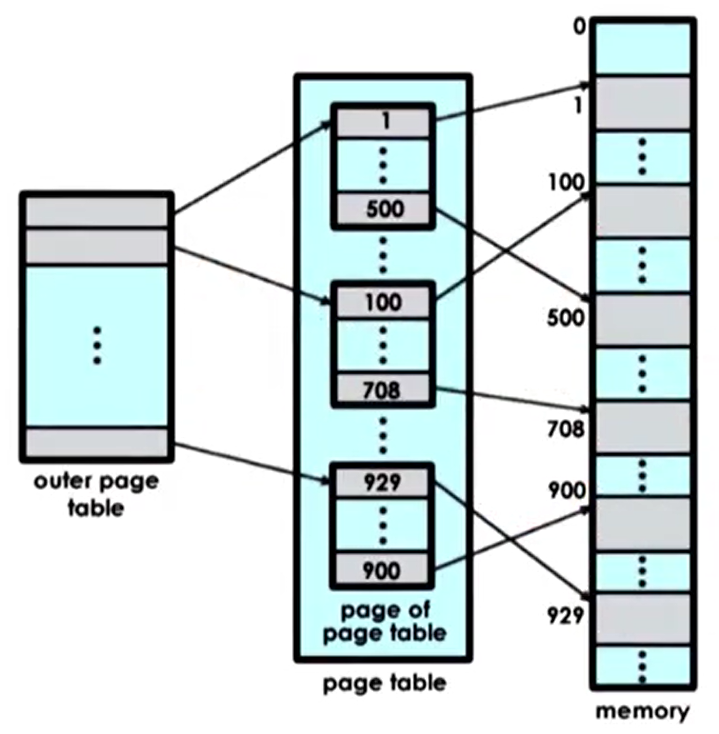
1. the outer level (outer page table/top page table  ) is referred to as a page table directory 
    1. porinters to page tables
1. internal page table: has proper page tables as its components actually point to page tables 
    1. only for valid virtual memeory regions
    1. internais have the page frame number and all the protection that's for the physical address that are referenced by the virtual address
    1. the internal page tables exists only for thoses virtual memeory regions that are actually valid
    1. any kinds of holes in the vritual memory space will result in lack of internal page tables
    1. On malloc 
        1. a new internal page table may be allocated (if necessary), 
        1. set the appropriate page table directory for that entry
        1. the new internal page table entry will correspond to some portion of the newly alllocated virtual memory region requested by the process
1. To find the right element
    1. the virtual address is split into anothe component
    1. the last portion of the address is still the offset: used to compute the offset within the actual page
    1. the first two components of the address: 
        1. indices into the page tables, into the different levels of the page table hierachy
        1. produce the physical frame number (starting address of the physical region)
        1. the first portion: index into the outer page table 
        1. the second portion: index into the page table
1. address format
    1. 10 bits for the internal page table offset
        1. page size: 2^10
    1. 10 bits for interal page table  
        1. the internal page table can address 2^10 elements  
    1. every single internal page table can address 2^10 * 2^10 page size = 1MB of memory
1. whenever there is a gap in the virtual memory (1MB) we dont' need to allocate the interal page table => reduce the overall size of the page table required for a particular process
1. vs single level page table design where page table has to be  able to translate every single virtual address and it has entries for every singel virtual page number 
    1. Hierachical helps reduce of memeory requriement for page table
1. additional layers
    1. page table directory pointer (3rd level)
    1. patge table directory prointer map (4th level)
    1. important on 64 bit architecture 
        1. larer and more sparse
            1. larget gaps = could save more internal page table components
            1. may save entire page table diretories as a result of certain gaps in the virutal address space

How a 64-bit virtual address can be interpreted to determine which indices are used into the different leels of the page table hierachy
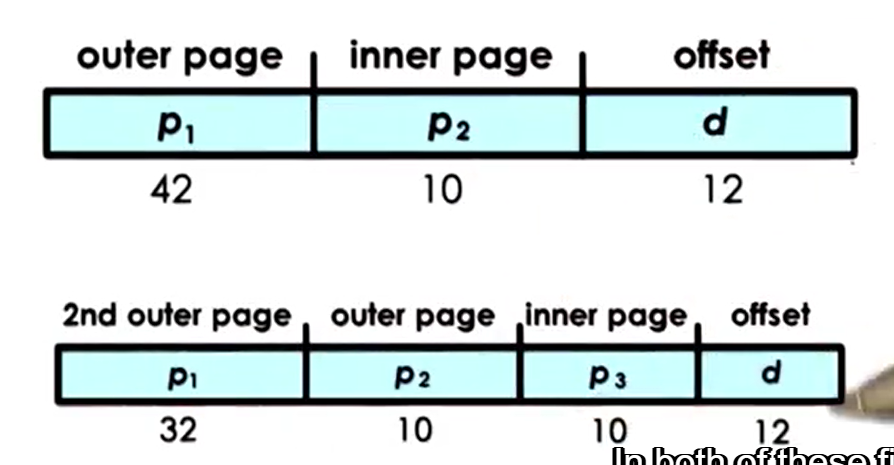
1. the top one has two page table layers
1. the bottom one has three page table layers
1. in both figures the offset field is the actual index into the actual physical page table
1. tradeoff in supporting multilevels in the page table hierachy: as we add multi levels
    1. pros:
        1. the internal page tables and page table directories cover smaller regions of the virtual address space
        1. potential reduced page table size
            1. it is more likely that the virtual address space will ahve gaps that will match that granularity and we will be able to reduce the size of the page table
    1. cons: 
        1. more memory accesses requried for translation
        1. increased translation latency

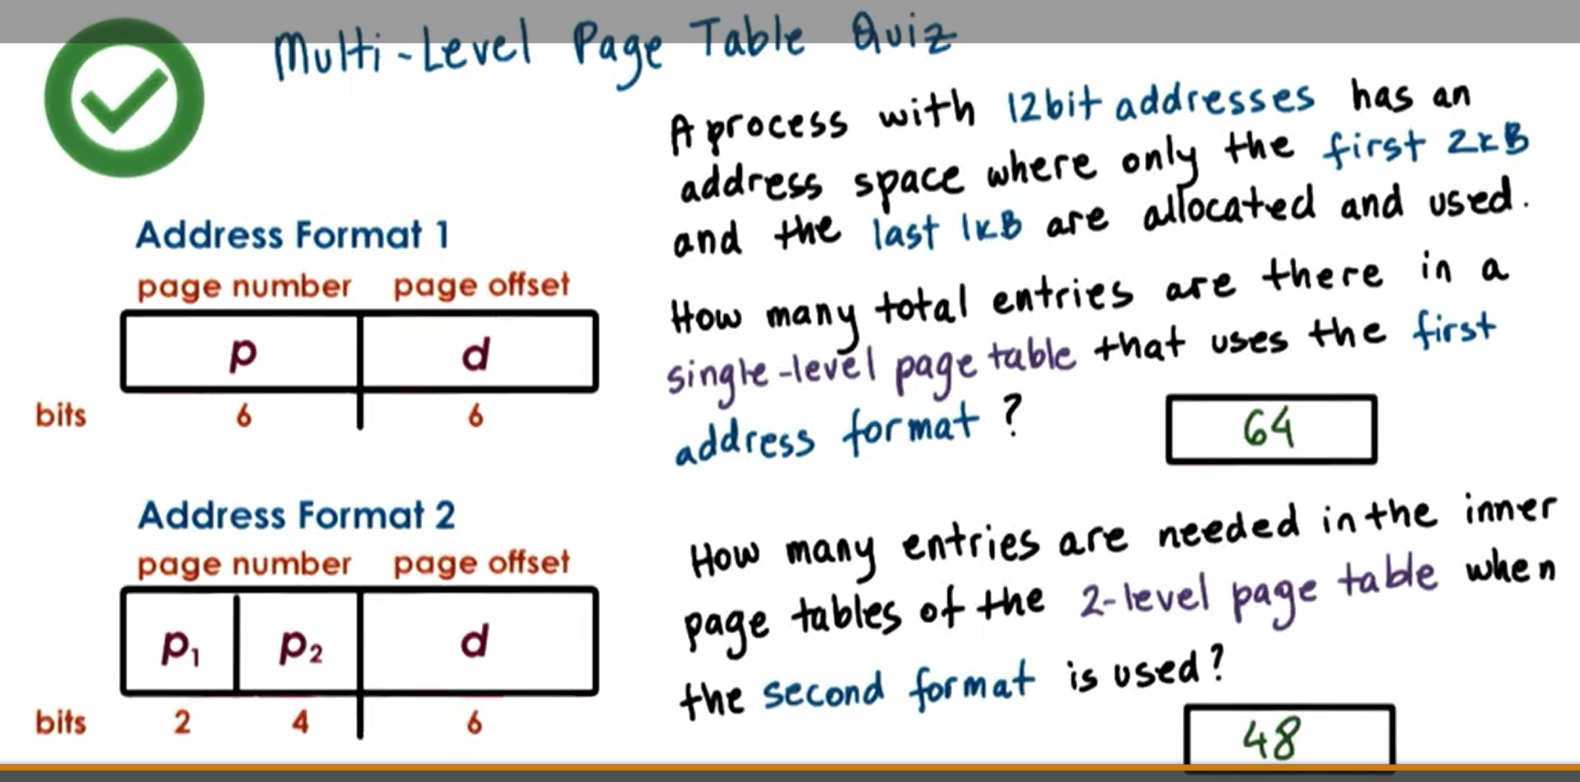
1. both offset is 6 bits: each page is 2^6 => 64bits
1. first
    1. 2^6 (VPN) total pages
    1. have entry for each page number so 64 for Q1
1. second
    1. the outer page table address 2^10 (4+6) virtual addresses (1kb)
    1. one of the entries in the outer page table needn't be populated with inter page table
    1. inter page table has 2^4 = 16 virtual address entries
    1. 64 - 16 = 48

### Overhead of Address Translation
1. for each memory reference
    1. single level page table
        1. x1 access to paget table entry
        1. x1 access to memory
    1. Four-level page table
        1. x4 access to page table entries
        1. x1 access to memory
1. Page table cache
    1. MMU Level address translation: 
         1. on most architectures the MMU hardware integrates a hardware cache (transilation look aside buffer or TLB) dedicated for caching address translation
         1. On each address translation, first TLB cache is quickly referenced 
         1. if the resulting address can be generated from TLB content then we have a TLB hit and we can bypass all the requried memory access for the translation
         1. on TLB miss => page table access from memory
     1. TLB has protection/validity bits to verify correctness/generate fault
     1. a small numbers of cached address in TLB can result in a high TLB hit rate, because of a high temporal and spatial locality in the memory reference
 1. on x86 Core i7
     1- per core 
         1. 64-entry data TLB
         1. 128-entry instruction TLB
     1. 512-entry shared second-level TLB
     1. determined to be sufficiently effective to address the typical memory access needs of processes today

### Inverted Page Tables
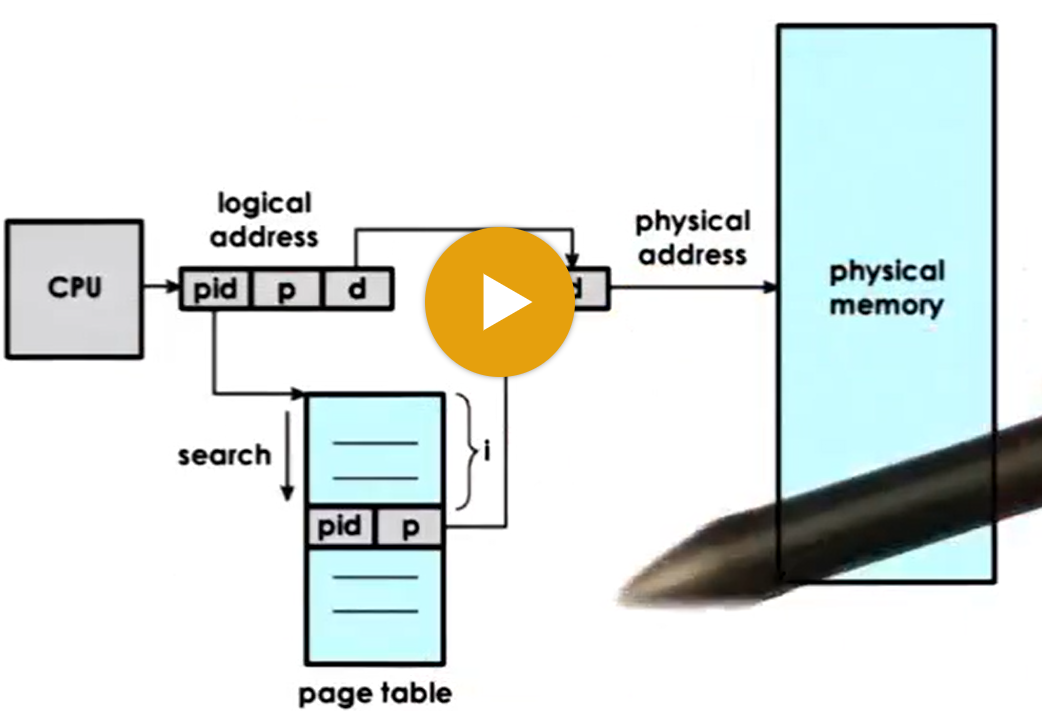
1. for high end computer we have physical memory on the order of tens of terabytes
1. the virtual memory of an address space can read petabytes and beyond
1. it would be much more efficeinty to have a page table structure on the order of the avaiable physical memory vs on the order of virtual memory that a process can have 
1. to find the translation, that page table is searched based on the process ID and first part of the virtual address 
1. when the approrpiate pid and p entry is found in the page table, the index or the element where this information is stred will denote the physical frame number of the memory location that's indexed by this logical address, 
1. then combined with the actual offset to produce the physical address  
1. problem:
    1. a linear search of the page table to find the entry match the pid p 
1. the physical memory can be arbitrarily assigned to different processes the table isn't really ordered
    1. there may be two consecutive entries that represent memory allocated to two different processes
    1. no some clever search technique to speed up this process
1. the TLB will catch a lot of these memory refereces so the detailed search is not perfromed very frequently
1. to address the issue
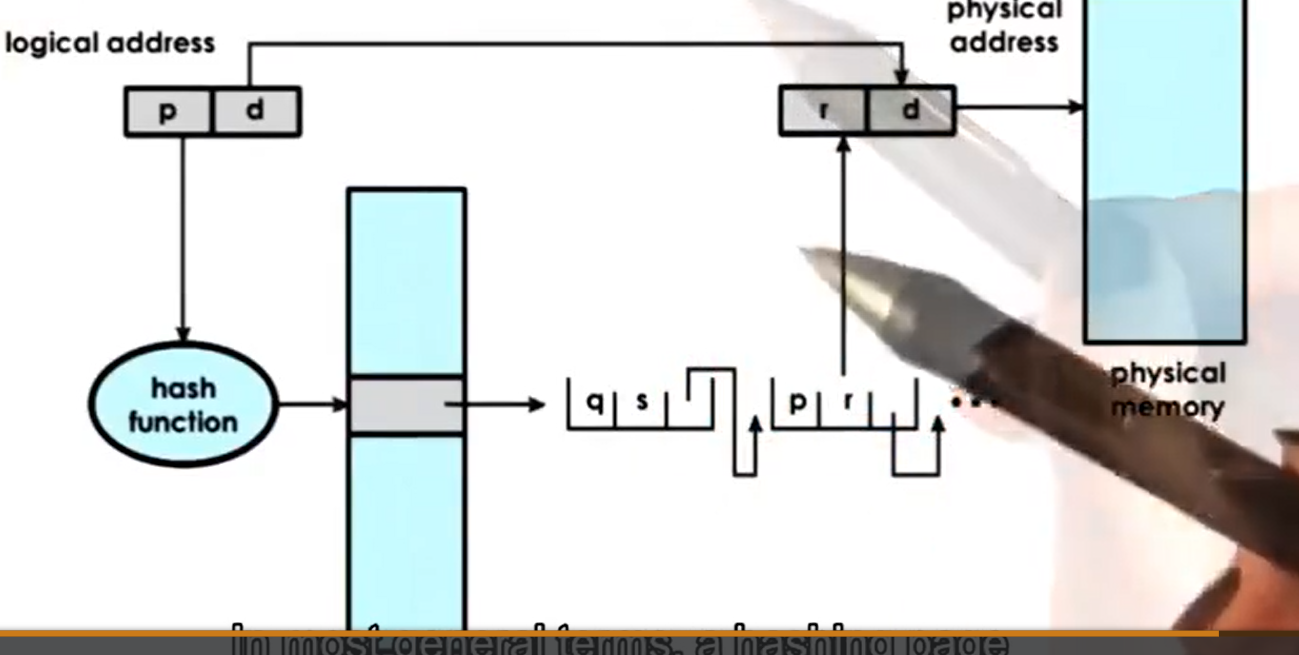
    1. invert page tables are supplemented with so-called Hashing Page Tables
    1. Hashing page table 
        1. A hash is computed on a part of the address, 
        1. that is the entry into the hash table that points to a linked list of possible matches for this part of t he address
        1. this can allows us to speed up the process of the linear search to narrow it odwn to few possible entries into the inverted page table

### Segment
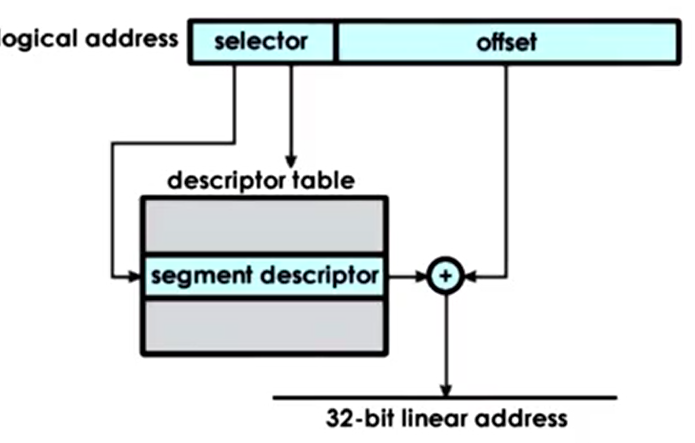
1. Segments
    1. arbitrary granularity or size
    1. different segments will correspond to some logically meaningful components of the address space (code, heap, data, staack ...)
    1. Virtual address include a segment descriptor and an actual offset
        1. segment descriptor is used in combination with a descriptor table to produce information regarding the physical address of the segemnt 
        1. the two are combined to produce the linear address of teh memory reference
    1. a segment coudl be represented with a contiguous portion of physical memory
        1. defined by its base address and limit registers, which implies the segment size
    1. in practice, segementaiton and paging are used together
    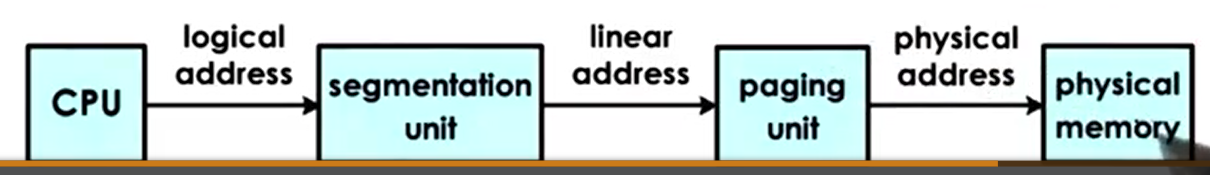
        1. the address produced with the process (linear address) is passed to the paging unit (a multileve lhierachical page table) to ultimately computer the actual physical address
        1. type of translation is determined by the hardware
            1. IA x86_32 => segmentation + paging
                1. Linux: upto 8k segments per process and another 8k global segments
            1. IA x86_64 => default: paging (segment+paging supported for backward compatiblity)

### How large is a page
1. 10-bit offset -> 1kb page size
1. 12-bit ofset -> 4kb page size
1. Linux/x86
    1. 4kb(default), 
    1. 2MB (large pages) 21 bits, reduce page table by a factor of 512
    1. 1GB (huge pages) 30 bits, reduce page table by a factor of 1024
    1. benefits of large page size
        1. more bits in the address are used for these offset bits
        1. fewer bits are used to represent the virtual page number
        1. fewer entries needed in the page table
        1. significantly reduce the size of the page table
        1. more TLB hits
    1. downsides
        1. internal fragmentation: waste of memory
            1. if the memory page is not pupulated there will be a large unused gaps withink the page iteself
            1. lead to internal fragmentation
            1. thus smaller page sizes of 4kb are commonly used
            1. large page table for databases in memory data stores
1. on different systems, depending on the OS and hardware architecture, different page sizes may be supported
    1. Solaris 10/SPARC architecture: 8kB, 4MB, 2GB

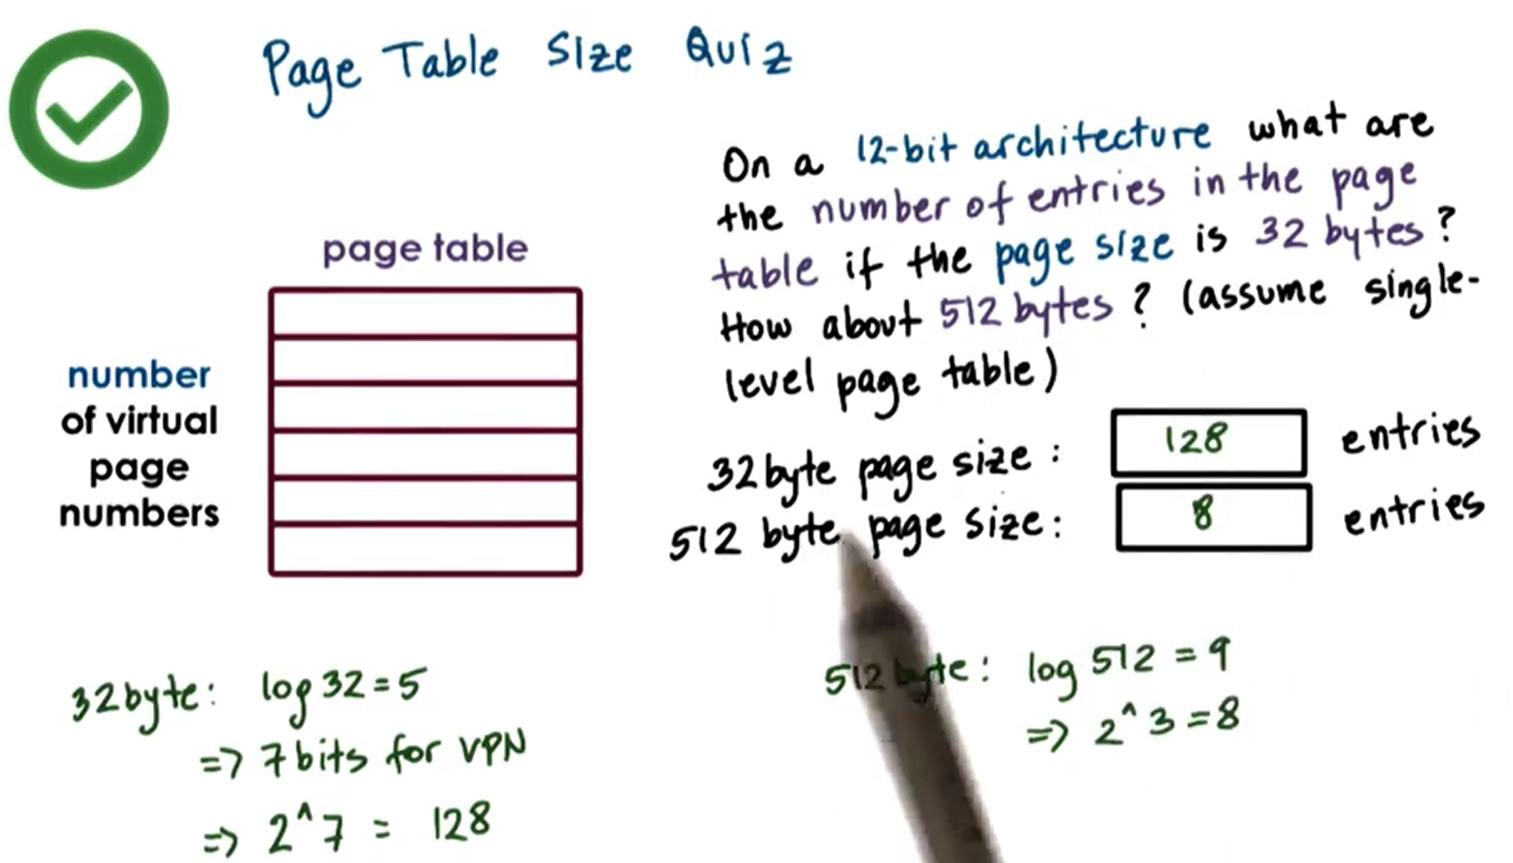

### Memory Allocation
1. memory management subsystem of OS
1. memeory allocator
    1. determines what are the physical pages that will be allocated to particular virutal memory regions
    1. once memory allocator establishes a mapping simly determine physical address from virtual address adn check validity/permission
1. exist at the kernel level and user level
        1. kernel-level allocator
            1. allocate mrmory regions such as pages for the kernel for various components of thekernel state
            1. for certain static state for the process when they are created
                1. codes
                1. stack, 
                1. initialized datum
            1. keep track of the free memeory avaiable in the system
        1. user level allocator
             1. dynamic process state(heap): malloc/free
                 1. request from the kernel some amount of memory from its free pages and release it when they are done.
                 1. Once kernel allocates some memory to a malloc call, the kernel is no longer involved in the management of the space
                 1. memeory will be used by user-leve lallocator is being used 
                 1. a number of options: dlmalloc, jemalloc, Hoard, tcmalloc
                     1. tradeoff in terms of cache effciency or friendiness with respect to how they behaved in a multithreaded environemnt or other aspects

### Memory Allocation Challenges
1. to manage 16 physical page frames
1. takes requests for page frames
    1. alloc(2), alloc(4), alloc(4), alloc(4), free(2), alloc(4)
    1. allocation need to contiguous
    1. external fragmentation
    1. need to leave 3 & 4 free
1.  permit coalescing/aggregation of free areas

### Linux kernel's two basic allocation mechanisms to solve the external fragmentation
1. Bubby allocator
    1. starts with some consecutive memory region that's free 
    1. of a size that's a power of two
    1. on request subdivide into 2^x chunks and find smallest 2^x chunk that can satisfy request
    1. fragmentation still there 
    1. on free, need to check buddy to see if you can aggregate into a larger chunk (to check adjacent region/buddy)
    1. aggregate more up the tree
    1. pro: aggregation of free areas can be performed very fast and very well
    1. the checking of what are free areas in the system can further be propagated up the tree to chekc the buddies of the 16 page free area
    1. the addresses of each of the buddies differ only by 1 bit: easier to perform the necessary check when combining or splitting chunks
    1. problem: there are a lot of data structure that are common in the linux kernel that are not of a size that's close to a power of 2.
        1. task data structure (task_struct): 1.7k
1. Slab allocator: caches for common object types/sizes  on  top of contigous memory 
    1. to solve the external fragmentation, linux use slab allocator in the kernel
    1. builds custom object caches on top of slabs
    1. slabs represent contiguously allocated physical memory
    1. when the kernel starts, it precreate caches for different object type
    1. when allocation comes from a particular object type, it will go straight to the cache and it will use one of the elements in this cache
    1. if none of the entries is avaiable the kernel will create another slab and it will preallocate an additional portion of contiguous physical memory to be managed by this slab allocator
    1. pros:
        1. internal fragmentation avoided
        1. external fragmentation is not an issue (refiled with same size data structure)
1. combination of the two in the Linux kernel are really effective methods to deal with both the fragmentation and the free memory managemnet challenges

### Demand paging
1. Virtual memory >> Physical memory => 
    1. virtual memroy page not always in physical memory
    1. backing physical page frame can be repeatedly saved and restored to/from secondary storage (paging/demand paging)
1. demand paging
    1. pages swapped in/out of memory and a swap partition(e.g. on disk)
    1. when a page is not in memory: present bit in the page table entry is 0
    1. when there is a reference to that page, memory management will raise and exception and cause a trap into the OS kernel
    1. on an access the memory management unit will raise an exception(page fault) pushed into the OS
    1. the OS kernel determine that this exception is a page fault
        1. it can determine that it had previously swapped out this memory page onto disk
            1. establish correct disk access 
            1. issue an I/O operation to retreve the page 
            1. once the page is broung into memory, the OS will determine a free frame where this page can be placed
            1. it can use the page frame number for that page to update the page table entry
            1. control is pushed back into the process 
            1. theprogram counter will be restared with the same instructions
            1. the reference will now be made again
            1. at this point the page table will find a valid entry with a reference to this particualar physical location
            1. physical address scpace will change after swap
    1. page pinned: page to be constantly present in memory/maintain the same physical memory in this lifetime: swapping disabled
        1. useful when CPU is interacting with devices that support direct memory access support (DMA) 

### Freeing up Physical Memory
1. when should page s be swapped out
    1. periodically when teh amount of occupied memory reaches a particular threshold, the OS will run some page out daemon that look for pages can be freed
    1. when memroy usage is above threadhold (high watermark)
    1. when CPU usage is below threadhold  (low watermark) (not to disrupt the execution of some applications too much)
1. which pages should be swapped out?
    1. pages that won't be used 
    1. history-based prediction
        1. Least-recently used (LRU policy)
            1. access bit to track if page is referenced
    1. pages that don't need to be written out to disk/secondary storage 
        1. dirty bit to track if a page has been modified
    1. avoid non swappable pages
        1. containing important kernel state
        1. used for I/O operation
1. In linux and most OS
    1. a number of pararments are avaiable  to allow the system administrator to configure thw swapping nature of the system
        1. thresholds 
        1. target page count (how many pages should be replaced during a period of time)
    1 categorize pages into diffrent types
        1. claimable 
        1. swappable
    1. 'Second change" variation of LRU
        1. perform two scans of a set of pages before determining which one should be swapped out and reclaimed
        

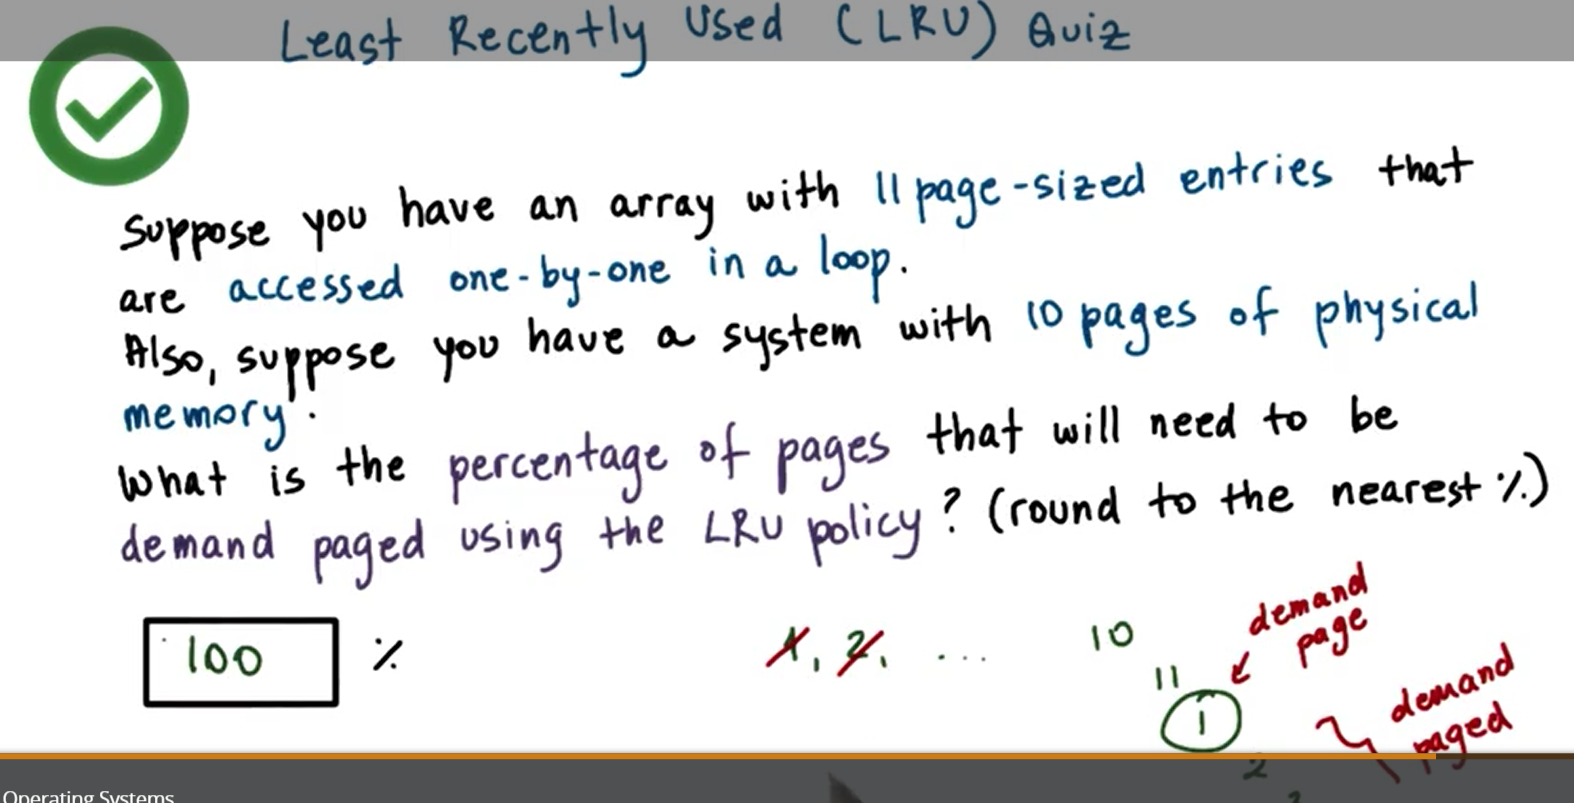
LRU can result in poor performance

### MMU Hardware
1. perform translation track access enforce protection
1. useful to build other services and optimizations
    1. Copy-on-Write("COW")
1. On process creation
    1. copy entire parent address space 
    1. many pages are statci don't change   
        1. why keep multiple copies
    1. map new virtual address to orginal page
    1. write protect original page, we can track concurrent accesses to it
    1. if only read
        1. save memroy and time to copy 
    1. On write from ether parent or child process
        1. page fault and create actual copy
        1. update the page tables of the two processes
        1. pay copy cost only if necessary
        1. there may be other reference to this protected feature so whether or not the protection will be removed once the copy is performed depend on who else is using this page

### Checkpointing
1. failure & Recovery management technique
1. periodically save process state
1. failure may be unavoidable
1. but can restart from checkpoint so recovery much faster
1. Simple approcach
    1.  pause of execution of the proccess 
    1. copy entire state
1. better approach
    1. take advantage of hardware support
    1. write-project the entire address space of the process (hardware) and copy everything at once
    1. process will continue executing, continue dirtying pages
    1. copy diffs of "dirtied"pages fro incremental checkpoints
        1. track the dirtied pages with hardware MMU support
        1. copy only the differences, only those pages that have been modified
        1. incremental check point
    1. rebuild from multiple diffs or in background the diffs can be aggregated to produce more complete checkpoints of the process 
1. can also be used in other services
    1. debugging
        1. rewind-replay (RR) 
             1. rewind: retart the execution of the same process from some earlier point(checkpoing)
             1. move forward and see if we can establish the error/bug
        1. gradually go back to older checkpoint until we find the error
    1. Migration
        1. continue on antoher machine 
        1. useful in scenarios such as disaster recoveries (to conitnue theprocess on antoher machine that will not crash)
        1. consolidation: migrate processes and migrate load onto as few machine as possible to save power and energy
        1. implemntation:
            1. repeat checkpoints in a fast loop until pause-and-copy becomes acceptable(or unavoidable)

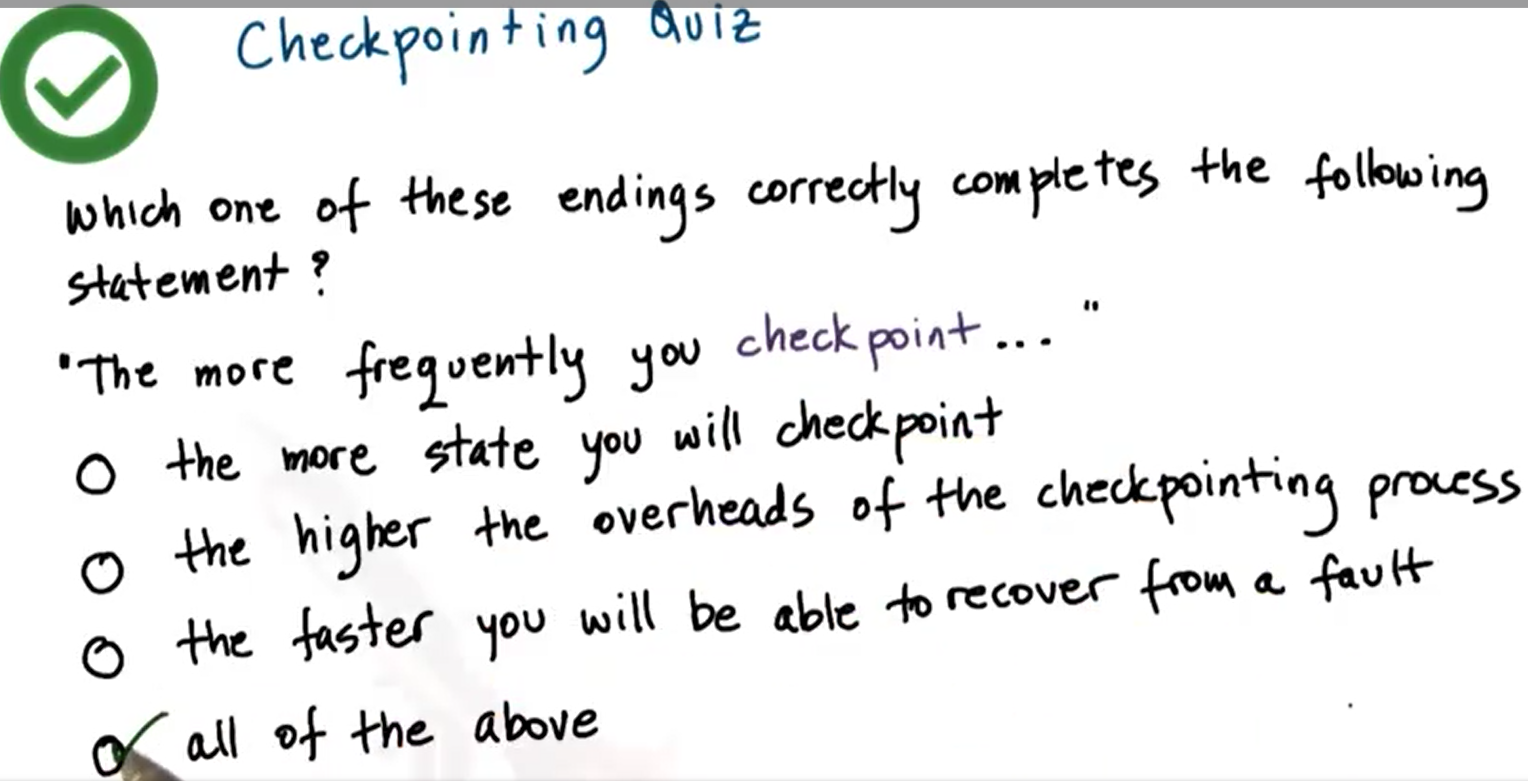